# Working with Matplotlib

Previous IPython Notebook Tutorial: [02_instagram_analyze_Data_Cleaning](https://github.com/odubno/instagram_analyzer/blob/master/IPython_Notebook_Files/02_instagram_analyze_Data_Cleaning.ipynb)

Here, we'll be pulling all of our previous scripts together to extract and clean data from instagram in order to create matplotlib graphs.

In [1]:
import requests
import requests
from pandas.io.json import json_normalize
import pandas as pd
import datetime

def instagram_data(query):
    base_url = "https://api.instagram.com/v1"
    CLIENT_ID = '768fcf1f36c94eb08506bae0a9caffa31' #fake id
    url = '{0}/tags/{1}/media/recent?client_id={2}&count=30'.format(
        base_url, query, CLIENT_ID)
    r = requests.get(url)
    j = r.json()   
    results = []
    if 'data' in j: 
        data = j['data']
        df_instance = json_normalize(data)
        results.append(df_instance)        
    df = pd.DataFrame().append(results)    
    return df

def instagram_data_clean(instagram_data_df):
    df = instagram_data_df 
    cols = [
        'comments.count',
        'likes.count',
    ]    
    df_cols = df[cols]
    df_2 = df_cols.rename(columns=lambda x: x.replace('.',' ').title())  
    return df_2

In [2]:
instagram_data('nyc').head(2) # queries data for nyc. first 2 rows

attribution caption.created_time       caption.from.full_name  \
0        None           1444151890  The Real JT The Bigga Figga   
1        None           1444151889                   Vito Kurtz   

  caption.from.id                       caption.from.profile_picture  \
0      2208618272  https://igcdn-photos-f-a.akamaihd.net/hphotos-...   
1      2222484418  https://scontent.cdninstagram.com/hphotos-xfa1...   

  caption.from.username           caption.id  \
0      jtthebiggafigga1  1089947514954786259   
1         donvito_kurtz  1089947507985026765   

                                        caption.text  comments.count  \
0  Mobile Wi-Fi #longbeach #2 #fillmoe  #movie #d...               0   
1  Proud to be\n\n#nyc #ny #newyork #newyorkcity ...               0   

  comments.data                ...                users_in_photo  \
0            []                ...                            []   
1            []                ...                            []   

  videos.low_bandwidth.height videos.low_bandwidth.url  \
0                         NaN                      NaN   
1                         NaN                      NaN   

   videos.low_bandwidth.width videos.low_resolution.height  \
0                         NaN                          NaN   
1                         NaN                          NaN   

   videos.low_resolution.url  videos.low_resolution.width  \
0                        NaN                          NaN   
1                        NaN                          NaN   

  videos.standard_resolution.height  videos.standard_resolution.url  \
0                               NaN                             NaN   
1                               NaN                             NaN   

   videos.standard_resolution.width  
0                               NaN  
1                               NaN  

[2 rows x 46 columns]

In [3]:
df_2 = instagram_data_clean(instagram_data('nyc'))

In [4]:
# New imports to work with
import matplotlib.pyplot as plt

%matplotlib inline

We could now pull data from Instagram, select the fields we want to work with, clean the fields and output graphs. 

See one graph below using matplotlib.

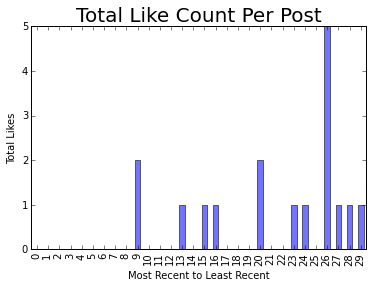

In [5]:
df_2['Likes Count'].plot(kind='bar', alpha=.55)
plt.title("Total Like Count Per Post", fontsize=20)
plt.xlabel('Most Recent to Least Recent')
plt.ylabel('Total Likes')

The graph above indexes at 0. That is the most recent post that was posted to the hashtag 'nyc'. The y-axis is responsible for how many likes each photo gets. The x-axis is responsible for recency, 0 denoting the instagram post that's most recent and so on.